# Problem

1. Lakukan hypothesis testing terhadap dataset.
2. Ambil kesimpulan dari hasil analisa

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Resampling

In [91]:
df = pd.read_csv("./covid_19_indonesia_time_series_all.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


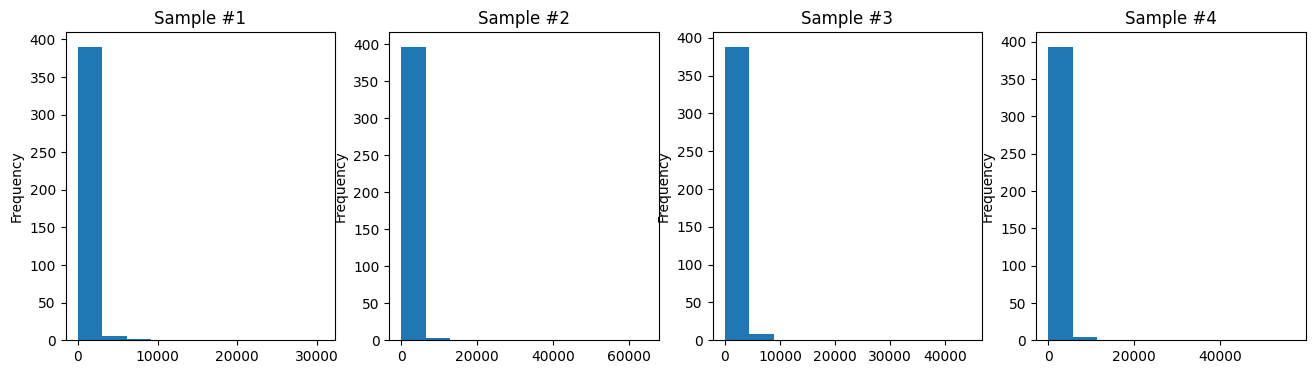

In [92]:
fig, ax = plt.subplots(ncols=4, figsize = (16,4))
for i in range(4):
    df.loc[:,'New Cases'].sample(400).plot(kind='hist', bins=10, ax=ax[i])
    ax[i].set_title('Sample #{}'.format(i+1))

## Single Sample Hypothesis Testing

In [93]:
df_sorted = df.copy()
df_sorted['Date'] = pd.to_datetime(df_sorted['Date'])
df_sorted = df_sorted.sort_values(['Location ISO Code','Date']).reset_index(drop=True)

In [94]:
df_sorted.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-26,ID-AC,Aceh,1,0,0,1,1,0,1,...,4.225615,0.19,0.19,0.0,0.0,0.0,0.00%,100.00%,NaN,NaN
1,2020-03-27,ID-AC,Aceh,3,0,0,3,4,0,1,...,4.225615,0.57,0.76,0.0,0.0,0.0,0.00%,25.00%,3.00,1.0
2,2020-03-28,ID-AC,Aceh,1,0,0,1,5,0,1,...,4.225615,0.19,0.95,0.0,0.0,0.0,0.00%,20.00%,0.33,1.0
3,2020-03-29,ID-AC,Aceh,0,0,0,0,5,0,1,...,4.225615,0.00,0.95,0.0,0.0,0.0,0.00%,20.00%,0.00,1.0
4,2020-03-30,ID-AC,Aceh,0,0,0,0,5,0,1,...,4.225615,0.00,0.95,0.0,0.0,0.0,0.00%,20.00%,1.00,1.0


In [95]:
df_aceh = df_sorted.loc[df_sorted['Location ISO Code'] == 'ID-AC']
df_aceh_daily_new_cases = df_aceh.loc[:,['Date', 'New Cases']] \
                                 .groupby('Date') \
                                 .sum()
'Aceh Average New Cases a Day: {0}' \
        .format(np.round(df_aceh_daily_new_cases['New Cases']
                  .mean()))

'Aceh Average New Cases a Day: 49.0'

In [96]:
df_aceh_this_year = df_aceh.loc[df_aceh['Date'] >= '2022-01-01']
df_aceh_this_year_daily_new_cases = df_aceh_this_year.loc[:,['Date', 'New Cases']] \
                                                     .groupby('Date') \
                                                     .sum()
'Aceh Average New Cases a Day this year: {0}' \
    .format(np.round(df_aceh_this_year_daily_new_cases['New Cases']
              .mean()))

'Aceh Average New Cases a Day this year: 22.0'

In [97]:
df_aceh_this_year_daily_new_cases

,New Cases
Date,
2022-01-01,0
2022-01-02,1
2022-01-03,0
2022-01-04,0
2022-01-05,0
...,...
2022-09-11,3
2022-09-12,1
2022-09-13,1


Our hypothesis on this case:

H0: μ >= 49.0

H1: μ < 49.0

In [106]:
# t_statistic = (x bar - mu)
#               ------------
#               ( std / np.sqrt(number of rows) )
t_stat, p_val = stats.ttest_1samp(a = df_aceh_this_year_daily_new_cases['New Cases'], 
                                  popmean = df_aceh_daily_new_cases['New Cases'].mean(),
                                  alternative='less')
print('P-valiue:', p_val) 
print('t-statistics:', t_stat)

-8.990582879321233
P-valiue: 2.751024953217394e-17
t-statistics: -8.990582879321233


/var/folders/w9/5lrd8m1x4f586v9ynn8xrryw0000gn/T/ipykernel_1353/3657278846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_aceh_daily_new_cases['New Cases'],


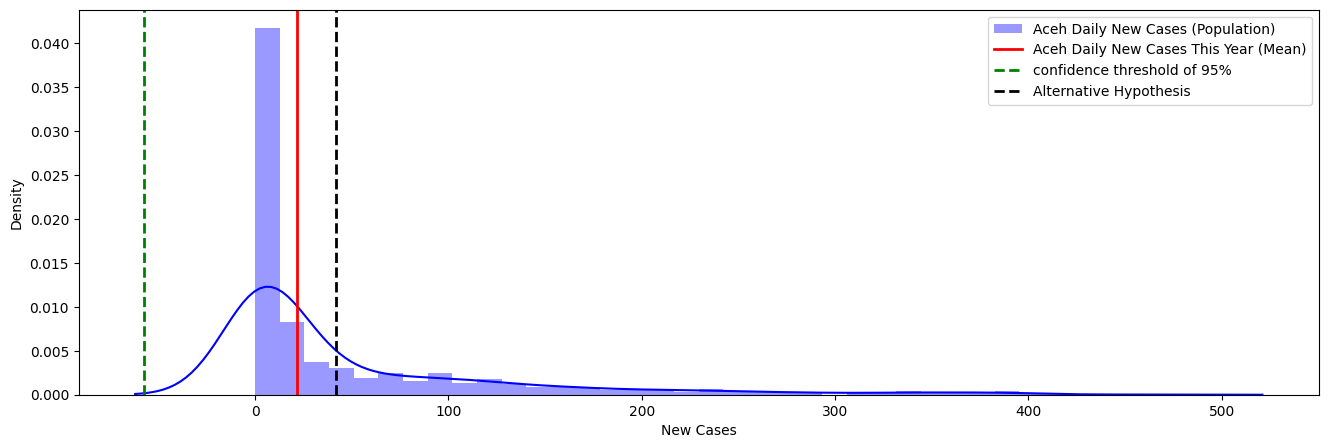

In [99]:
ci = stats.norm.interval(0.90, 
                         df_aceh_this_year_daily_new_cases['New Cases'].mean(), 
                         df_aceh_this_year_daily_new_cases['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(df_aceh_daily_new_cases['New Cases'], 
             label='Aceh Daily New Cases (Population)', 
             color='blue')
plt.axvline(df_aceh_this_year_daily_new_cases['New Cases'].mean(), 
            color='red', 
            linewidth=2, 
            label='Aceh Daily New Cases This Year (Mean)')
plt.axvline(ci[0],
            color='green', 
            linestyle='dashed', 
            linewidth=2, 
            label='confidence threshold of 95%')
plt.axvline(df_aceh_daily_new_cases['New Cases'].mean() + 
                t_stat*df_aceh_daily_new_cases['New Cases'].std(), 
            color='black', 
            linestyle='dashed', 
            linewidth=2, 
            label='Alternative Hypothesis')
plt.legend()

# Kesimpulan

Since our p-value is less than `0.05`, so we reject the nul hypothesis and we can conclude that, Aceh average daily new cases for the last year (>= 2022-01-01) is decrerasing than the last 3 years (>= 2020-01-01).

# Playground

## Is it normal distribution or skewed?

Rule: -0,5 < x < 0,5 (normal distribution)

In [100]:
# output: 15.35
# conclusion: positive skew
df_sorted.loc[:,"New Cases"].skew()

15.359818139181007

## Outlier Detection (IQR)

https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

In [101]:
temp_df_new_cases = df_sorted.loc[:,"New Cases"]
q1, q3 = temp_df_new_cases.quantile([.25,.75])
iqr = q3 - q1
upper_limit = temp_df_new_cases.std() + 1.5*iqr
bottom_limit = temp_df_new_cases.std() - 1.5*iqr
# fun fact: 0 new cases are considered an outlier. So, do not blindly use this method.
bottom_limit, upper_limit

(2130.129838150327, 2511.129838150327)